In [11]:
import sys
from fancy_einsum import einsum

import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
)  # Hooking utilities
from transformers import AutoTokenizer, pipeline, logging, AutoModelForCausalLM, AutoConfig
from transformer_lens import ActivationCache, HookedTransformer

from huggingface_hub import notebook_login
from datasets import Dataset
import pandas as pd
import transformers
import torch
import einops  # Make sure einops is imported
import numpy as np 

from neel_plotly import line, imshow, scatter
import transformer_lens.patching as patching
import circuitsvis as cv
import matplotlib.pyplot as plt
from pathlib import Path
# Import from local libraries

from utils import *

from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model
# Method to calculate ID
import argparse
import json


In [3]:

from utils.load_Datasets import load_Datasets
from utils.load_Model import load_Model
from utils.utils import *

In [4]:
model, tokenizer = load_Model('olmo-1b', checkpoint='main')


Trying to load model : olmo-1b / checkpoint : main -> from ../Models/OLMo-1B/main


/home/gridsan/jsong/.local/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [10]:

dataset_name='openwebtext_parquet'
dataset_subset=[0]

dataset = load_Datasets(dataset_config_dict={
            'name': dataset_name,
            'subset': dataset_subset,
            'base_directory': None
        })
print(f"Original dataset size: {len(dataset)}")

Original dataset size: 101000


In [11]:
length = [len(tokenizer(text)['input_ids']) for text in dataset[:10000]['text']]

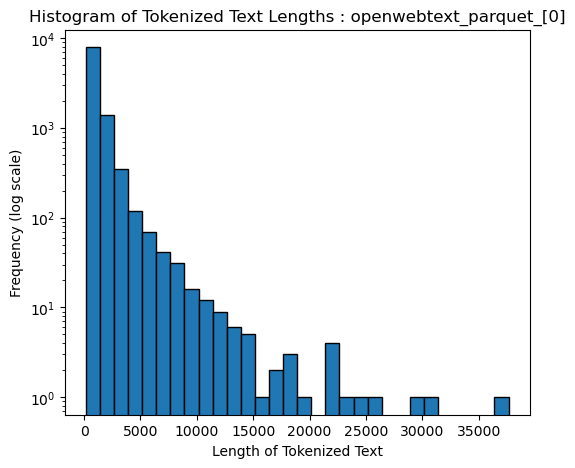

Fraction of texts with length more than 2000: 0.1110
Fraction of texts with length more than 5000: 0.0218
Fraction of texts with length more than 10000: 0.0050
Fraction of texts with length more than 20000: 0.0010
Fraction of texts with length more than 50000: 0.0000


In [12]:
# Create histogram
plt.figure(figsize=(6, 5))
plt.hist(length, bins=30, edgecolor='black')
plt.title(f'Histogram of Tokenized Text Lengths : {dataset_name}_{dataset_subset}')
plt.xlabel('Length of Tokenized Text')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.show()
total = len(length)
fractions = {
    "more_than_2000": sum(l > 2000 for l in length) / total,
    "more_than_5000": sum(l > 5000 for l in length) / total,
    "more_than_10000": sum(l > 10000 for l in length) / total,
    "more_than_20000": sum(l > 20000 for l in length) / total,
    "more_than_50000": sum(l > 50000 for l in length) / total
}

# Print fractions
for key, value in fractions.items():
    print(f"Fraction of texts with length {key.replace('_', ' ')}: {value:.4f}")


In [8]:
import matplotlib.pyplot as plt
